Import Directries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


Load the dataset

In [5]:
df = pd.read_csv("C:\\Users\\harsh\\Downloads\\Lab2_dataset.csv")

Use the CountVectorizer function in sklearn to transform the "text" feature to a vector representation of a predetermined size.



In [6]:
vectorizer = CountVectorizer(max_features=1000)  # You can adjust max_features as needed
X = vectorizer.fit_transform(df['text'])
y = df['label']

Split the dataset into training and testing.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training and Evaluation:

Train the Sklearn SVC model on the training dataset and evaluate on the test set

In [8]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
print("SVC Accuracy:", svc_accuracy)
print("SVC Classification Report:")
print(classification_report(y_test, svc_pred))

SVC Accuracy: 0.9497584541062802
SVC Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.95      0.96       742
        spam       0.88      0.96      0.92       293

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



Train and evaluate also on the Gaussian and Multinomial Naiive Bayes Classifiers

In [9]:
#Gaussian
gnb_model = GaussianNB()
gnb_model.fit(X_train.toarray(), y_train)
gnb_pred = gnb_model.predict(X_test.toarray())
gnb_accuracy = accuracy_score(y_test, gnb_pred)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, gnb_pred))

#Multinomial
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)
mnb_pred = mnb_model.predict(X_test)
mnb_accuracy = accuracy_score(y_test, mnb_pred)
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, mnb_pred))

Gaussian Naive Bayes Accuracy: 0.9420289855072463
Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.93      0.96       742
        spam       0.85      0.97      0.90       293

    accuracy                           0.94      1035
   macro avg       0.92      0.95      0.93      1035
weighted avg       0.95      0.94      0.94      1035

Multinomial Naive Bayes Accuracy: 0.9342995169082126
Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

         ham       0.97      0.94      0.95       742
        spam       0.86      0.92      0.89       293

    accuracy                           0.93      1035
   macro avg       0.91      0.93      0.92      1035
weighted avg       0.94      0.93      0.93      1035



Compare between the performance of all models and comment on the reasons behind the differences seen between the three models.

In [11]:
print("For Gaussian")
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, gnb_pred))

print("For multiomial")
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, mnb_pred))

For Gaussian
Gaussian Naive Bayes Accuracy: 0.9420289855072463
Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.93      0.96       742
        spam       0.85      0.97      0.90       293

    accuracy                           0.94      1035
   macro avg       0.92      0.95      0.93      1035
weighted avg       0.95      0.94      0.94      1035

For multiomial
Multinomial Naive Bayes Accuracy: 0.9342995169082126
Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

         ham       0.97      0.94      0.95       742
        spam       0.86      0.92      0.89       293

    accuracy                           0.93      1035
   macro avg       0.91      0.93      0.92      1035
weighted avg       0.94      0.93      0.93      1035



Use the AB_NYC_2019.csv dataset for this part.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load the dataset
df_nyc = pd.read_csv("C:\\Users\\harsh\\Downloads\\Lab2_dataset.csv")

Remove outliers based on price per night for a given apartment/home.

In [14]:
#Z-score
def remove_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column])
    df_no_outliers = df[(z_scores < threshold) & (z_scores > -threshold)]
    return df_no_outliers

In [15]:
#IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df_no_outliers

Compare the Z-score approach and the whiskers approach in terms of who is better to remove the outliers in this case.

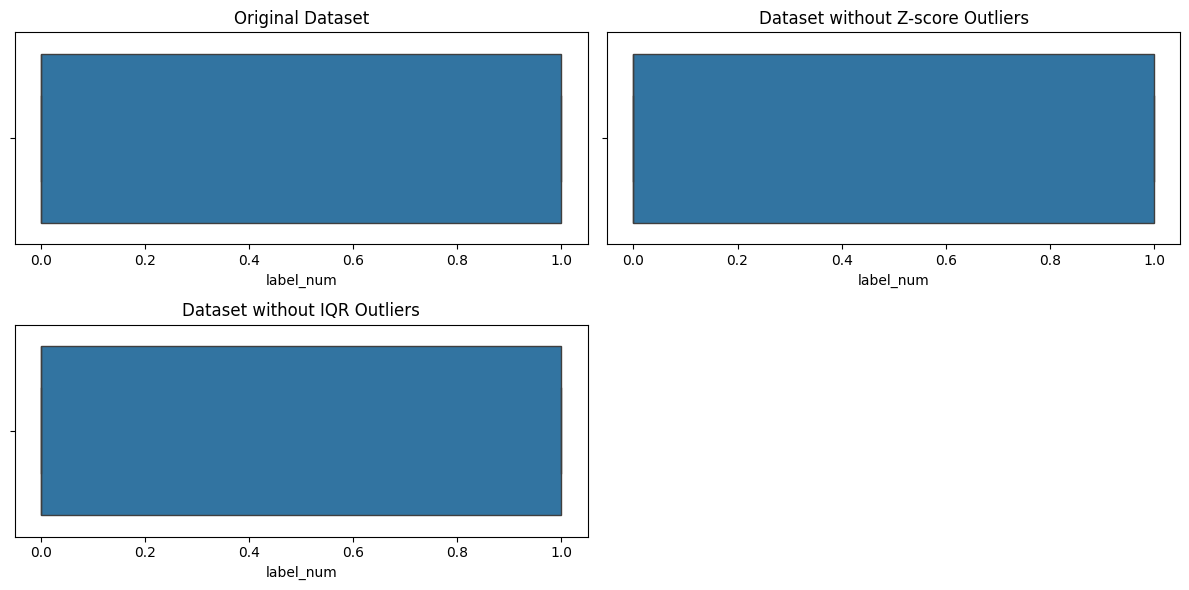

In [17]:
df_no_outliers_zscore = remove_outliers_zscore(df_nyc, 'label_num')
df_no_outliers_iqr = remove_outliers_iqr(df_nyc, 'label_num')

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x=df_nyc['label_num'])
plt.title('Original Dataset')

plt.subplot(2, 2, 2)
sns.boxplot(x=df_no_outliers_zscore['label_num'])
plt.title('Dataset without Z-score Outliers')

plt.subplot(2, 2, 3)
sns.boxplot(x=df_no_outliers_iqr['label_num'])
plt.title('Dataset without IQR Outliers')

plt.tight_layout()
plt.show()